In [2]:
%%time
import warnings
warnings.filterwarnings("ignore")
import pyart
import pydda
import netCDF4 as nc
import xarray as xr
import datetime as dt
import numpy as np
import wradlib as wrl
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, FuncFormatter
import pandas as pd
from matplotlib import axes
from matplotlib.ticker import NullFormatter
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob, os, sys
import shutil
import pathlib
%matplotlib inline

CPU times: user 160 µs, sys: 1e+03 ns, total: 161 µs
Wall time: 162 µs


In [3]:
def add_map(ax, b = 0, l = 0):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', alpha=0.3, 
                         linestyle='-', draw_labels=True)
    gl.xlabels_top = False
    gl.xlabels_bottom = b
    gl.ylabels_left = l
    gl.ylabels_right= False
    gl.xlines = True
    gl.ylines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.add_feature(feat.BORDERS, lw = 0.5)
    ax.add_feature(feat.LAND, lw = 0.3, fc = [0.9,0.9,0.9])
    ax.add_feature(feat.COASTLINE, lw = 0.5)
    ax.add_feature(feat.OCEAN, alpha = 0.5)
    ax.add_feature(feat.STATES.with_scale("10m"), alpha = 0.5, lw = 0.5)

In [4]:
%%time
def test_radar(file=None, moment="DBZHC_F", sweep = 0):
    myradar = pyart.io.read(file)
    myradar.scan_type = "ppi"
    mydisplay = pyart.graph.RadarMapDisplay(myradar)
    if moment.lower().startswith("d") or  moment.lower().startswith("r"):
        cmap = "pyart_NWSRef"
    elif moment.lower().startswith("v"):
        cmap = "pyart_NWSVel"
    else:
        cmap = "turbo"
    mydisplay.plot(moment, sweep = sweep, cmap=cmap)
    plt.show()
    return myradar

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 16 µs


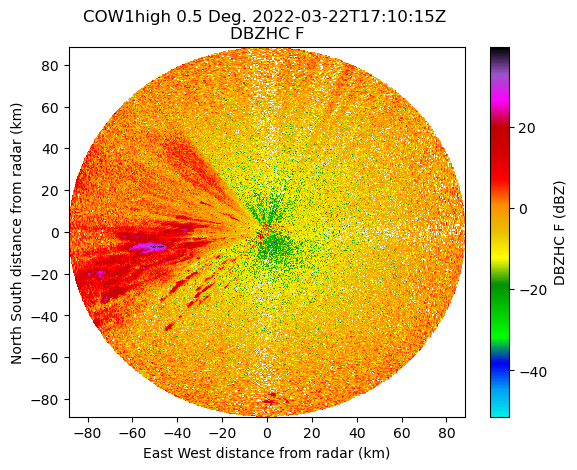

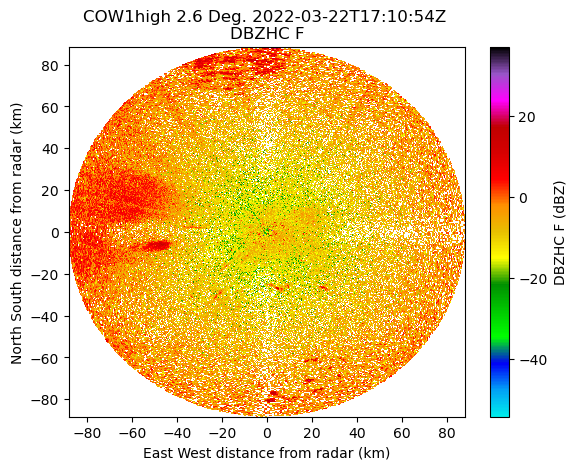

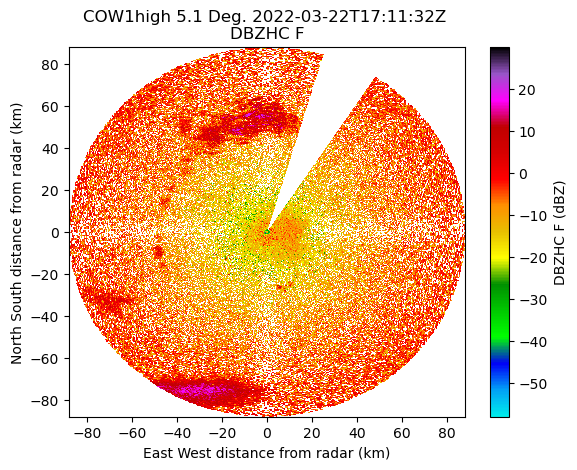

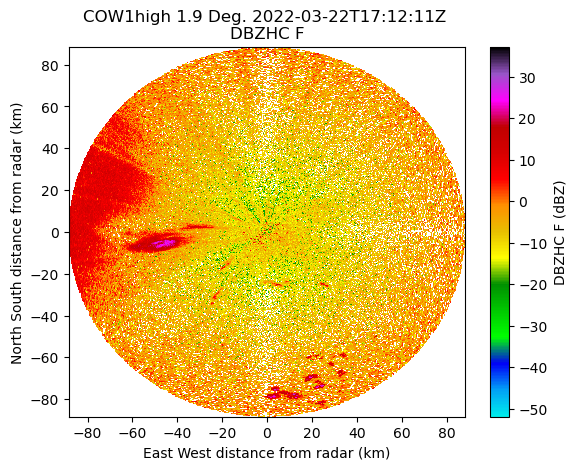

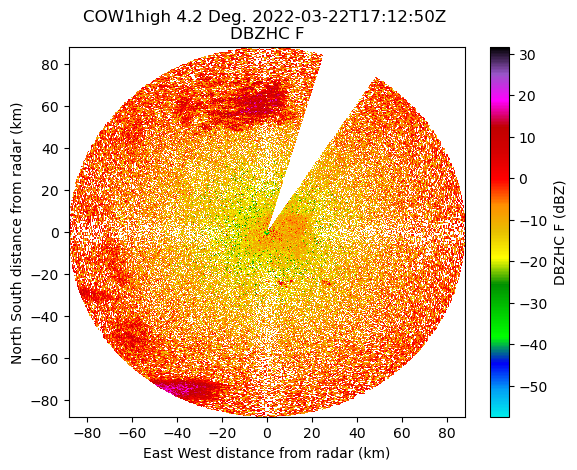

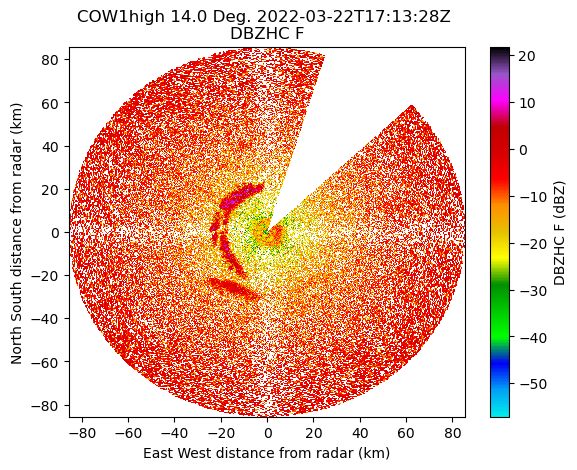

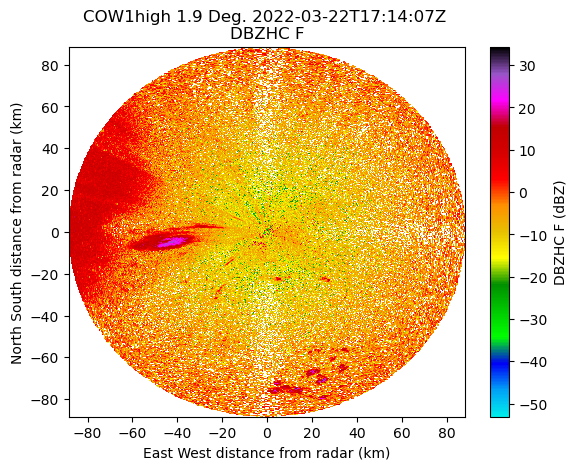

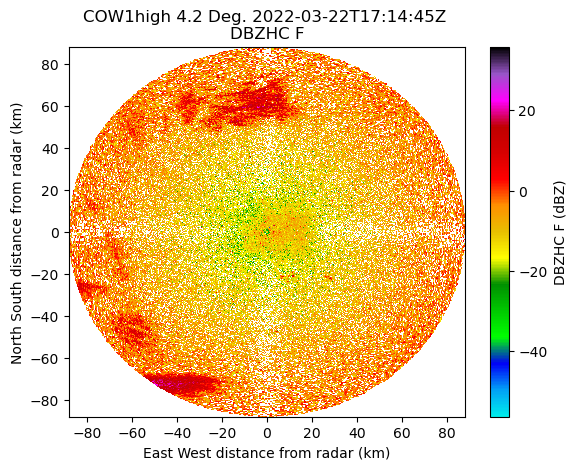

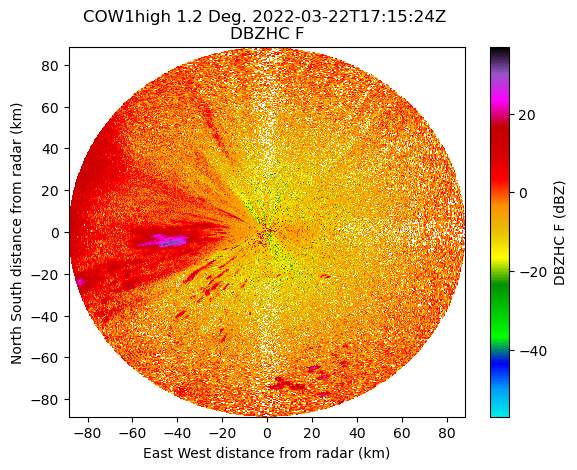

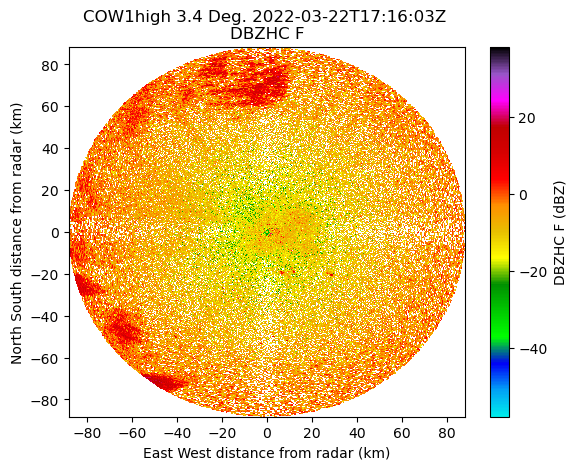

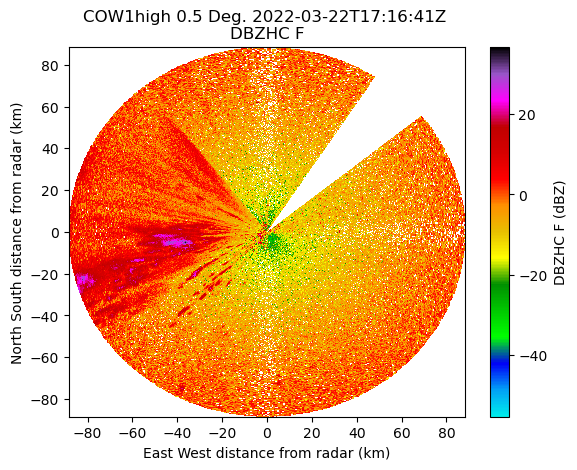

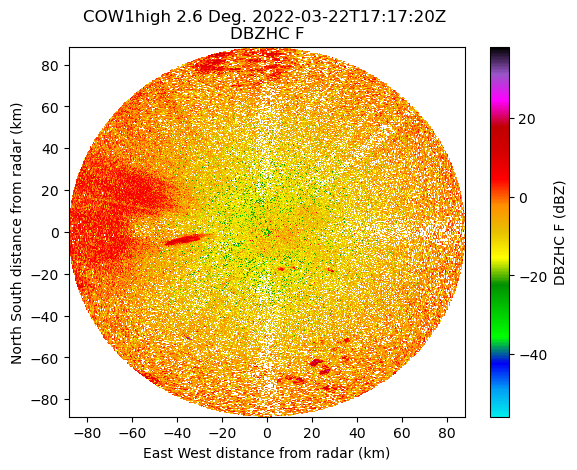

In [ ]:
[test_radar("20220322/cfrad.20220322_171015.498_to_20220322_171838.494_COW1high_SUR.nc", sweep=i) for i in range(0, 39, 3)]

In [11]:
def radar_info(file=None):
    ds = xr.open_dataset(file)
    print("Time: {}".format(ds.time.values))
    print("Volume Number: {}".format(ds.volume_number.values))
    print("Fixed Angle: {}".format(ds.fixed_angle.values))
    print("Sweep Number: {}".format(ds.sweep_number.values))
    print("Range: {}".format(ds.range.values.max()/1e3))
    print("Lat: {}, Lon: {}".format(ds.latitude.values, ds.longitude.values))

In [12]:
cffiles = sorted(glob.glob("20220322/*.nc"))

In [5]:
ds = xr.open_dataset("20220322/cfrad.20220322_171015.498_to_20220322_171838.494_COW1high_SUR.nc")

In [59]:
ds

<xarray.Dataset>
Dimensions:                           (frequency: 1, sweep: 1, r_calib: 1,
                                       time: 720, range: 1180)
Coordinates:
  * frequency                         (frequency) float32 5.55e+09
  * time                              (time) datetime64[ns] 2022-03-22T17:10:...
  * range                             (range) float32 87.5 162.4 ... 8.844e+04
Dimensions without coordinates: sweep, r_calib
Data variables: (12/142)
    volume_number                     float64 1.0
    platform_type                     |S32 b'fixed'
    primary_axis                      |S32 b'axis_z'
    status_xml                        |S1 b''
    instrument_type                   |S32 b'radar'
    radar_antenna_gain_h              float64 42.5
    ...                                ...
    RHOHV                             (time, range) float32 0.7866 ... 1.0
    PHIDP                             (time, range) float32 -70.04 ... -58.4
    KDP                               (time, range) float32 0.0 0.0 ... 0.0 nan
    DBZHCC                            (time, range) float32 -6.1 3.91 ... 1.2
    DBZHCC_F                          (time, range) float32 -8.25 -1.53 ... 0.64
    ZDRC                              (time, range) float32 2.35 -1.83 ... nan
Attributes: (12/25)
    Conventions:          CF-1.7
    Sub_conventions:      CF-Radial instrument_parameters radar_parameters ra...
    version:              CF-Radial-1.4
    title:                
    institution:          
    references:           
    ...                   ...
    site_name:            
    scan_name:            
    scan_id:              0
    platform_is_mobile:   false
    n_gates_vary:         false
    ray_times_increase:   true

In [10]:
radar = pyart.io.read("20220322/cfrad.20220322_171015.498_to_20220322_171838.494_COW1high_SUR.nc")

In [15]:
radar.fixed_angle['data']

masked_array(data=[ 0.49863282,  1.2017578 ,  1.9048828 ,  2.608008  ,
                    3.3990235 ,  4.217505  ,  5.090918  ,  0.47666016,
                    1.2017578 ,  1.9048828 ,  2.608008  ,  3.3990235 ,
                    4.222998  ,  8.013281  , 11.023535  , 14.033789  ,
                    0.44370118,  1.2017578 ,  1.9048828 ,  2.608008  ,
                    3.3990235 ,  4.222998  ,  5.090918  ,  0.47666016,
                    1.2017578 ,  1.9048828 ,  2.608008  ,  3.3990235 ,
                    4.222998  ,  5.0799317 ,  0.47666016,  1.2017578 ,
                    1.9048828 ,  2.608008  ,  3.3990235 ,  4.222998  ,
                    8.013281  , 11.034521  , 14.022802  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [18]:
radar.nsweeps

39